# Pandas数据处理120题知识点总结
## 第四章 提取满足条件的行列

---
  
　ID：wlong
　数据分析爱好者、目前小白一枚
　邮箱：wlong826@163.com
　CSDN：**[【数分小白龙】](https://blog.csdn.net/qq_38230663)**
　和鲸社区：**[【wlong】](https://www.heywhale.com/home/user/profile/5f0a61d72be199002c073935)**
　如果有不完善的地方，欢迎小伙伴评论区留言！
　最近博客、和鲸每周都会有所更新，欢迎大家**关注点赞分享**哦！
 
---

　本文的CSDN链接：[【四、提取满足条件的行列】](https://blog.csdn.net/qq_38230663/article/details/116398014?spm=1001.2014.3001.5501)
 
　如果有想学习爬虫的小伙伴，可以看这里：[【零基础入门Python爬虫--豆瓣、58同城、安居客等】](https://www.heywhale.com/mw/project/60be1fa8acdcb3001707b133)
	
　关于总结更详细的配套习题案例，看这👉：[【和鲸训练营第一期——Pandas基础】](https://www.heywhale.com/home/competition/60c086d8565cca001731537f)
	 

* 注：从这一章开始，就不放数据了哈，重点放在总结上，关于总结的配套习题，可以看这里哦！[【和鲸训练营第一期——Pandas基础】](https://www.heywhale.com/home/competition/60c086d8565cca001731537f)

## 1 提取具体单行列，多行列数据

### (1) 提取单行数据

In [ ]:
df.loc[32]
df.iloc[32,:]
df.iloc[32]

### (2) 提取单列数据

In [ ]:
df[['xxx']]

### (3) 提取多列数据

In [ ]:
#1.提取xxx1, xxx2, xxx3列数据：
df[['xxx1', 'xxx2', 'xxx3']]
 
#2.提取除倒数后三列之外的全部列数据：
df.iloc[:, :-3]

### (4) 提取第一列位置再1，10，15的值

In [ ]:
#方法一：
df.iloc[[1, 10, 15], 0]
 
#方法二：
df['col1'][[1, 10, 15]]
 
#方法三：
df['col1'].take([1, 10, 15])

## 2. 提取重复值所在的行列数据：duplicated()

### (1) 判断dataframe数据某列是否重复

In [ ]:
df.xxx.duplicated() # 注df.xxx 相当于 df['xxx']

### (2) 判断dataframe数据整行是否重复

In [ ]:
df.duplicated()

### (3) 判断dataframe数据多列数据是否重复(多列组合查询)

In [ ]:
df.duplicated(subset = ['xxx1','xxx2'])

### (4) 判断重复索引所在行列数据

In [ ]:
#方法一：
df[df.index.duplicated()]
 
#方法二：
df.index.is_unqiue

## 3. 提取数值条件判断

### (1) 判断某列元素值大于3的行

In [ ]:
df[df['xxx'] > 3]

### (2) 判断某列元素值大于3小于7的行

In [ ]:
df[(df['xxx'] > 3) & (df['xxx'] < 7)]

### (3) 提取某列最大值所在的行

In [ ]:
df[df['xxx'] == df['xxx'].max()]

### (4) 提取两列之后大于60000的最后三行

In [ ]:
df[(df['xxx1'] + df['xxx2']) > 60000].tail(3)

## 4. 提取含空值的行列

### (1) 提取xxx列含空值的行

In [ ]:
df[df['xxx'].isnull()]

### (2) 提取每列缺失值的具体行数

In [ ]:
for columname in df.columns: #遍历每一列 
    if df[columname].count() != len(df): #判断缺失行条件：所在列的值数等于总数据的长度
        #将存在缺失值的行的索引转换成列表储存
        loc = df[columname][df[columname].isnull().values == True].index.tolist()
        print('列名："{}",第{}行位置有缺失值'.format(columname, loc))

## 5. 提取某列不是数值或(包含)字符串的行

### (1) 提取某列数值类型不是浮点型的行(依据type() != float)

In [ ]:
for i in range(len(df)):
    if type(df['xxx'][i]) != float: #df['xxx'][i]df.iloc[i, 13]
        temp = temp.append(df.loc[i])
temp.head()

### (2) 提取某列包含字符串('--')的行

In [ ]:
# 方法一：isin()
df[df['xxx'].isin(['--'])]
 
# 方法二：contains()
df[df["xxx"].str.contains("--")]

### (3) 提取某列值为特定字符串的行

In [ ]:
# 方法一：
df[df['grammer'] == 'Python']
 
# 方法二：
results = df['grammer'].str.contains('Python')
results.fillna(value=False, inplace=True)
df[results]

## 6. 提取某列元素等于给定列表中任意元素的数据
- 如国家列(Endland, Italy, Russia)

In [ ]:
# 方法一：isin()
df[df['xxx'].isin(['England', 'Italy', 'Russia'])][['xxx', 'xxx1']]
 
# 方法二：loc提取
df.loc[df['xxx'].isin(['England', 'Italy', 'Russia']), ['xxx','xxx1']]

## 7. 提取某列以'数据'开头的行

In [ ]:
# 方法一：match函数
df[df['xxx'].str.match('数据')]
 
# 方法二：startswith函数
df[df['xxx'].str.startswith('数据')]

## 8. 提取第一列中不在第二列出现的数字

- isin()函数：判断数据是否存在，返回布尔型向量，可用于数据的过滤
   - Series.isin(vals)：判断Series的内容是否再vals中
   - Index.isin(vals)：判断索引值是否在vals中
   - DataFrame.isin(vals):
       - vals为列表时，判断DataFrame中数据是否在vals中
       - vals为字典时，判断DataFrame中对应列的数据是否在vals中

In [ ]:
df['xxx1'][~df['xxx1'].isin(df['xxx2'])] #~取反

## 9. 提取两列出现频率最高的数字 

In [ ]:
# 先将两列使用append()按行合并，再用计数函数：
temp = df['xxx1'].append(df['xxx2'])
temp.value_counts(ascending=False)#不加index，返回的是一个Series
temp.value_counts(ascending=False).index[:3] #返回一个数组

## 10. 提取某列中可以整除5的数字位置

In [ ]:
#方法一：
df[df['xxx'] % 5 == 0].index
 
#方法二：np.argwhere
np.argwhere(np.array(df['xxx'] % 5 == 0))

----

# 最后附上思维导图：

![Image Name](https://cdn.kesci.com/upload/image/quhcxpblj.png)

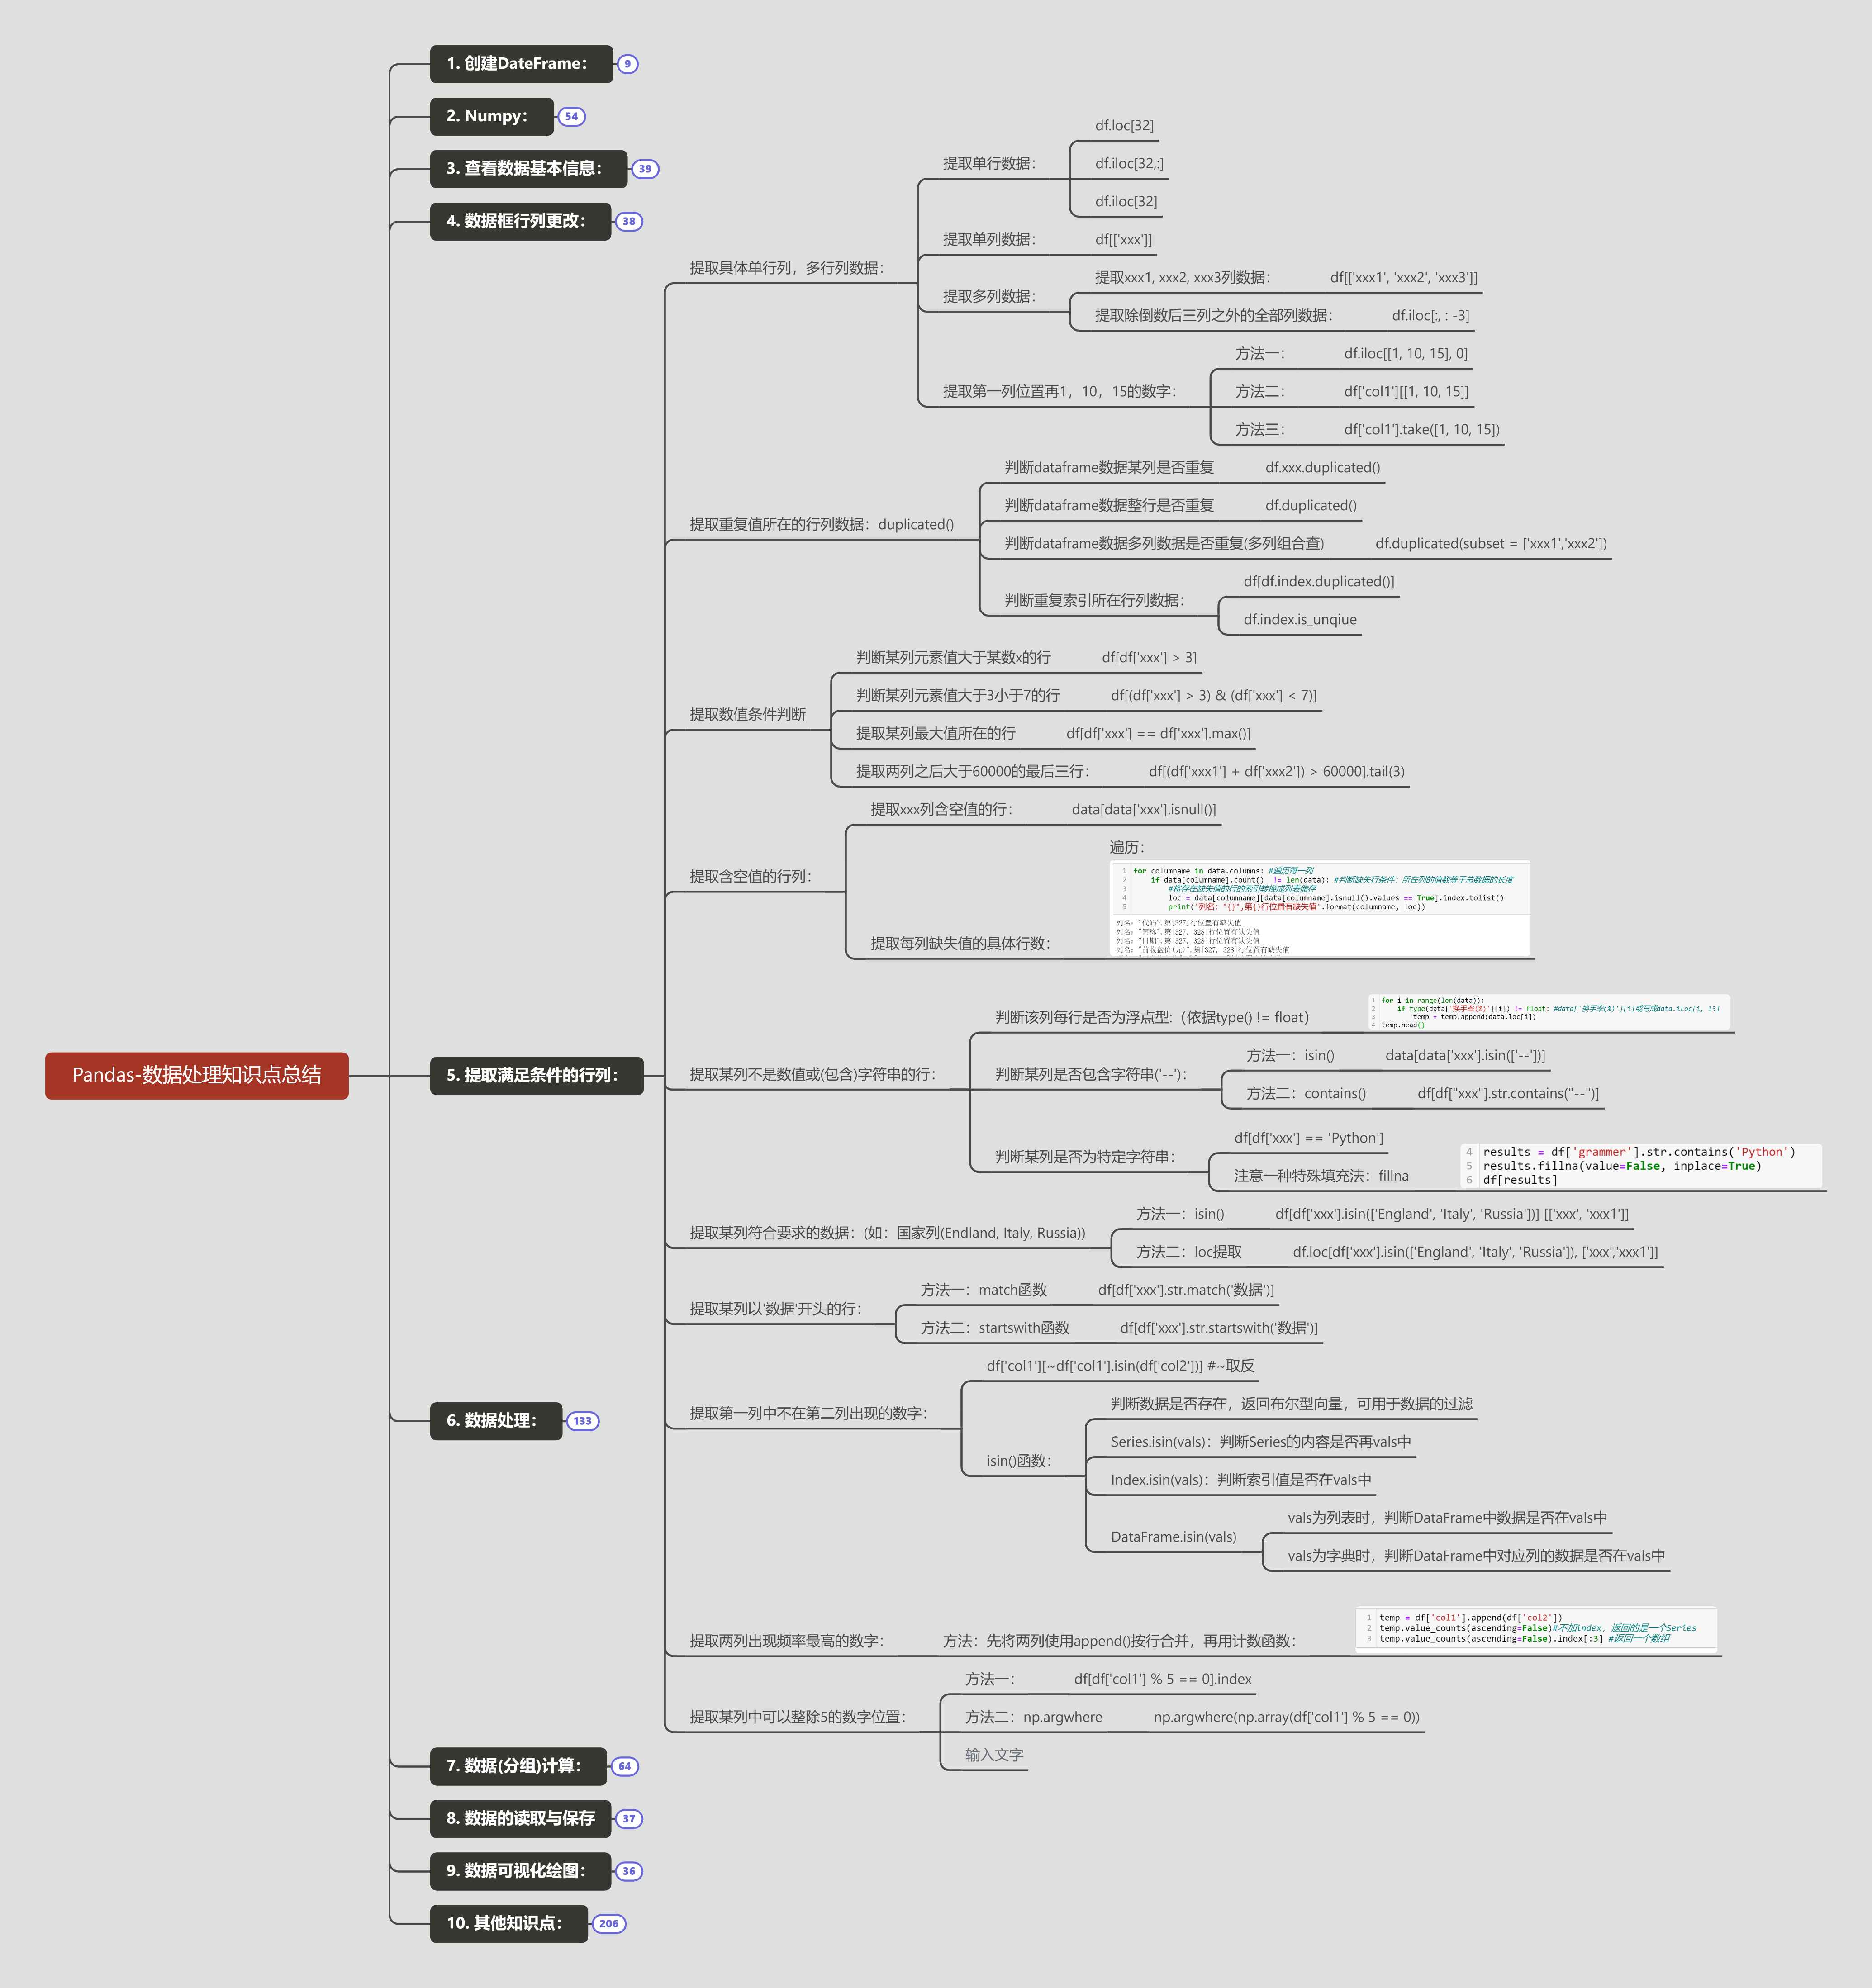